# Feature Importance

## Load Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

## Read data matrix

In [1]:
import pandas as pd
import psycopg2

# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'sepsis_micro'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

In [9]:
dataQuery = """select * from sepsis_micro.data_matrix_qc_1;"""
dataDf = pd.read_sql_query(dataQuery, con)
dataDf

,micro_specimen_id,person_id,seven_day_mortality,fourteen_day_mortality,twentyone_day_mortality,twentyeight_day_mortality,sixty_day_mortality,ninety_day_mortality,onetwenty_day_mortality,Ambulatory Clinic / Center,...,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last,time_to_antibiotic
0,2940,-470494077,0,0,0,1,1,1,1,0,...,-0.586379,2.441041,-0.053360,-0.804726,0.726778,-0.800329,0.048541,-0.857543,-0.077536,0.018778
1,3236,-762840899,0,1,1,1,1,1,1,0,...,-0.942367,-0.066982,1.677597,-1.840315,0.615396,-1.745000,0.621905,-1.037712,0.988716,0.018778
2,3720,-1481508426,0,0,0,0,0,0,0,0,...,-0.535524,-0.345652,-1.438125,-1.692373,1.376502,-0.989263,1.004149,-0.377094,-0.290787,0.022081
3,5214,2090709572,0,0,0,0,0,0,0,0,...,-0.789801,-0.554654,0.292832,-0.508844,-0.164272,-1.745000,-1.098189,-0.677375,-0.504037,-1.107961
4,10611,-961491032,0,0,0,0,0,0,0,0,...,1.091850,-0.763656,-0.399551,1.414391,0.763905,0.333277,-0.333703,0.043300,-0.859455,0.034054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7097,9986222,-1199717531,0,0,0,0,0,0,0,0,...,1.447838,-0.554654,0.465927,-0.065021,-0.498416,0.900080,2.533121,-0.377094,-0.575121,0.017126
7098,9989349,-1246337626,0,0,0,0,0,0,0,0,...,1.244416,1.953370,-0.399551,-1.248550,1.357938,-1.745000,-0.715946,0.463693,1.841718,0.031577
7099,9989996,-1704051650,1,1,1,1,1,1,1,0,...,-1.247500,-0.693988,0.119736,0.082921,-0.758306,-1.178197,-0.907067,-1.337993,-0.646204,0.018778
7100,9996881,768076701,0,0,1,1,1,1,1,0,...,-0.586379,-0.833323,-0.572647,-0.656785,-0.609797,0.144343,2.150878,-0.437150,-0.788371,0.031990


## Calculate Feature Importance with Univariate Metricies

In [10]:
X = dataDf.drop(['micro_specimen_id', 'person_id', 'seven_day_mortality', 'fourteen_day_mortality', 'twentyone_day_mortality', 'twentyeight_day_mortality', 'sixty_day_mortality', 'ninety_day_mortality', 'onetwenty_day_mortality'], axis = 1)
y_seven_day = dataDf['seven_day_mortality']
y_fourteen_day = dataDf['fourteen_day_mortality']
y_twentyone_day = dataDf['twentyone_day_mortality']
y_twentyeight_day = dataDf['twentyeight_day_mortality']
y_sixty_day = dataDf['sixty_day_mortality']
y_ninety_day = dataDf['ninety_day_mortality']
y_onetwenty_day = dataDf['onetwenty_day_mortality']

In [68]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

univariateDf = pd.DataFrame(X.columns, columns =['column'])
for key, y in {
        'seven_day': y_seven_day
      , 'fourteen_day': y_fourteen_day
      , 'twentyone_day': y_twentyone_day
      , 'twentyeight_day': y_twentyeight_day
      , 'sixty_day': y_sixty_day
      , 'ninety_day': y_ninety_day
      , 'onetwenty_day': y_onetwenty_day
    }.items():
    fValues = f_classif(X, y)
    mutual_info_classifValues = mutual_info_classif(X, y)
    tempDf = pd.DataFrame(list(zip(X.columns, fValues[0], mutual_info_classifValues)), columns =['column', 'f_value_' + key, 'mutual_information_' + key])
    tempDf['rank_' + key] = tempDf['f_value_' + key].rank(ascending=False)
    univariateDf = univariateDf.merge(tempDf, on=['column'])
univariateDf.sort_values(by=['f_value_seven_day'], ascending=False, inplace=True)
univariateDf.reset_index(inplace=True)
univariateDf.drop('index', axis=1)
univariateDf.head()

,index,column,f_value_seven_day,mutual_information_seven_day,rank_seven_day,f_value_fourteen_day,mutual_information_fourteen_day,rank_fourteen_day,f_value_twentyone_day,mutual_information_twentyone_day,rank_twentyone_day,f_value_twentyeight_day,mutual_information_twentyeight_day,rank_twentyeight_day,f_value_sixty_day,mutual_information_sixty_day,rank_sixty_day,f_value_ninety_day,mutual_information_ninety_day,rank_ninety_day,f_value_onetwenty_day,mutual_information_onetwenty_day,rank_onetwenty_day
0,113,gcs_motor_last,1720.037506,0.124689,1.0,1401.604824,0.119502,1.0,1247.388084,0.123115,1.0,1174.009417,0.113847,1.0,1172.233306,0.120625,1.0,1150.716231,0.119159,1.0,1121.965103,0.112270,1.0
1,115,gcs_eye_last,1266.164107,0.086674,2.0,1233.973196,0.088577,2.0,1191.154948,0.091299,2.0,1122.541411,0.074620,2.0,1157.701857,0.088625,2.0,1117.498742,0.084683,2.0,1084.539699,0.083977,2.0
2,68,gcs_motor_avg,1124.185544,0.095957,3.0,995.064565,0.093955,3.0,925.886803,0.095877,3.0,852.712811,0.090419,3.0,886.230355,0.086453,3.0,861.619768,0.085157,3.0,840.886804,0.086423,3.0
3,155,bicarbonate_last,925.334461,0.077314,4.0,789.816887,0.059589,6.0,719.530293,0.058494,6.0,691.436433,0.062052,6.0,660.517084,0.064524,6.0,592.990240,0.059712,6.0,600.145081,0.061078,6.0
4,114,gcs_verbal_last,806.000855,0.072540,5.0,852.895952,0.077500,5.0,893.971952,0.077384,4.0,848.349642,0.077807,4.0,862.998324,0.074257,4.0,854.876320,0.074667,4.0,829.021718,0.071844,4.0


In [69]:
univariateDf[univariateDf.column == 'time_to_antibiotic']

,index,column,f_value_seven_day,mutual_information_seven_day,rank_seven_day,f_value_fourteen_day,mutual_information_fourteen_day,rank_fourteen_day,f_value_twentyone_day,mutual_information_twentyone_day,rank_twentyone_day,f_value_twentyeight_day,mutual_information_twentyeight_day,rank_twentyeight_day,f_value_sixty_day,mutual_information_sixty_day,rank_sixty_day,f_value_ninety_day,mutual_information_ninety_day,rank_ninety_day,f_value_onetwenty_day,mutual_information_onetwenty_day,rank_onetwenty_day
134,158,time_to_antibiotic,6.950347,0.015961,135.0,5.002487,0.008298,141.0,4.582335,0.018588,141.0,4.060181,0.017366,141.0,3.612605,0.020858,141.0,3.480361,0.026672,140.0,3.429741,0.023469,139.0


In [70]:
univariateDf[univariateDf.column == 'visit_duration_hrs']

,index,column,f_value_seven_day,mutual_information_seven_day,rank_seven_day,f_value_fourteen_day,mutual_information_fourteen_day,rank_fourteen_day,f_value_twentyone_day,mutual_information_twentyone_day,rank_twentyone_day,f_value_twentyeight_day,mutual_information_twentyeight_day,rank_twentyeight_day,f_value_sixty_day,mutual_information_sixty_day,rank_sixty_day,f_value_ninety_day,mutual_information_ninety_day,rank_ninety_day,f_value_onetwenty_day,mutual_information_onetwenty_day,rank_onetwenty_day
81,25,visit_duration_hrs,74.182697,0.140934,82.0,58.966142,0.141547,88.0,34.818641,0.150726,109.0,18.136091,0.157029,121.0,4.082554,0.160002,140.0,1.590988,0.160397,150.0,0.330181,0.163378,156.0


## Plot Feature Importance with Univariate Metricies

### All Features

In [122]:
dfList = []
for i in ['seven_day', 'fourteen_day', 'twentyone_day', 'twentyeight_day', 'sixty_day', 'ninety_day', 'onetwenty_day']:
    tempDf = univariateDf[['column', 'f_value_' + i, 'mutual_information_' + i, 'rank_' + i]]
    tempDf['target'] = [i] * tempDf.shape[0]
    tempDf.columns = ['column', 'f_value', 'mutual_information', 'rank', 'target']
    dfList.append(tempDf)
plotDf = pd.concat(dfList)
plotDf.reset_index(inplace=True)
print(plotDf.shape)
plotDf.head()

(1113, 6)


/tmp/ipykernel_1570044/2355130284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf['target'] = [i] * tempDf.shape[0]


,index,column,f_value,mutual_information,rank,target
0,0,gcs_motor_last,1720.037506,0.124689,1.0,seven_day
1,1,gcs_eye_last,1266.164107,0.086674,2.0,seven_day
2,2,gcs_motor_avg,1124.185544,0.095957,3.0,seven_day
3,3,bicarbonate_last,925.334461,0.077314,4.0,seven_day
4,4,gcs_verbal_last,806.000855,0.072540,5.0,seven_day


<AxesSubplot:xlabel='f_value', ylabel='column'>

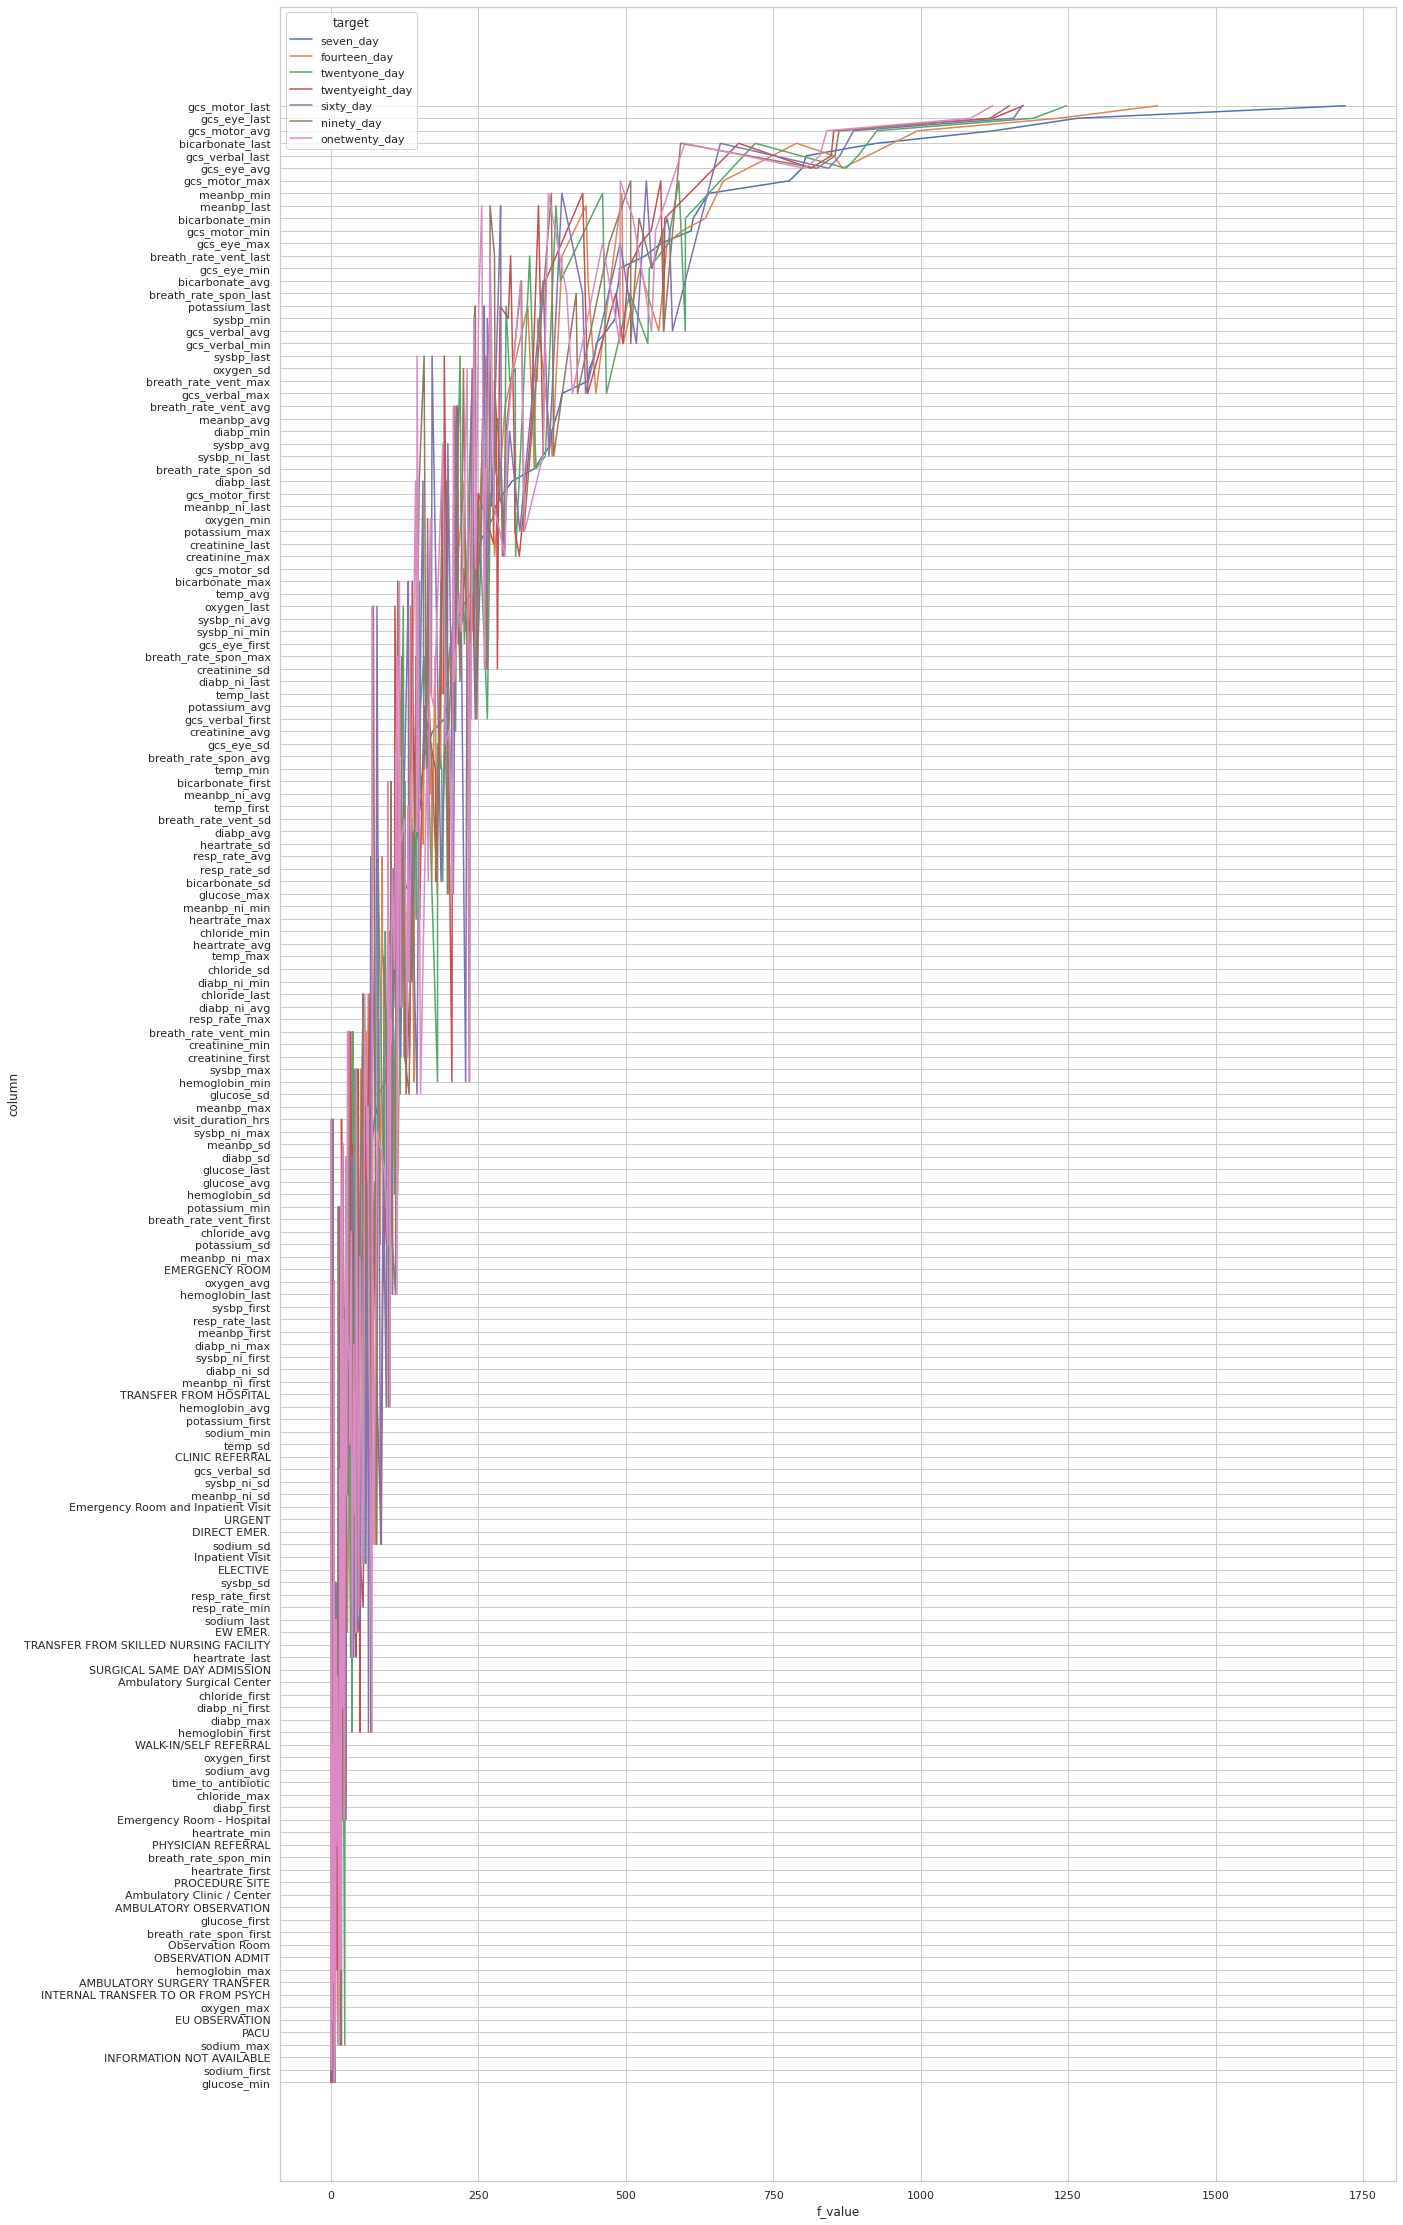

In [123]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,40))
sns.set_theme(style="whitegrid")
sns.lineplot(y=plotDf['column'], x=plotDf.f_value, hue=plotDf.target)

<AxesSubplot:xlabel='rank', ylabel='column'>

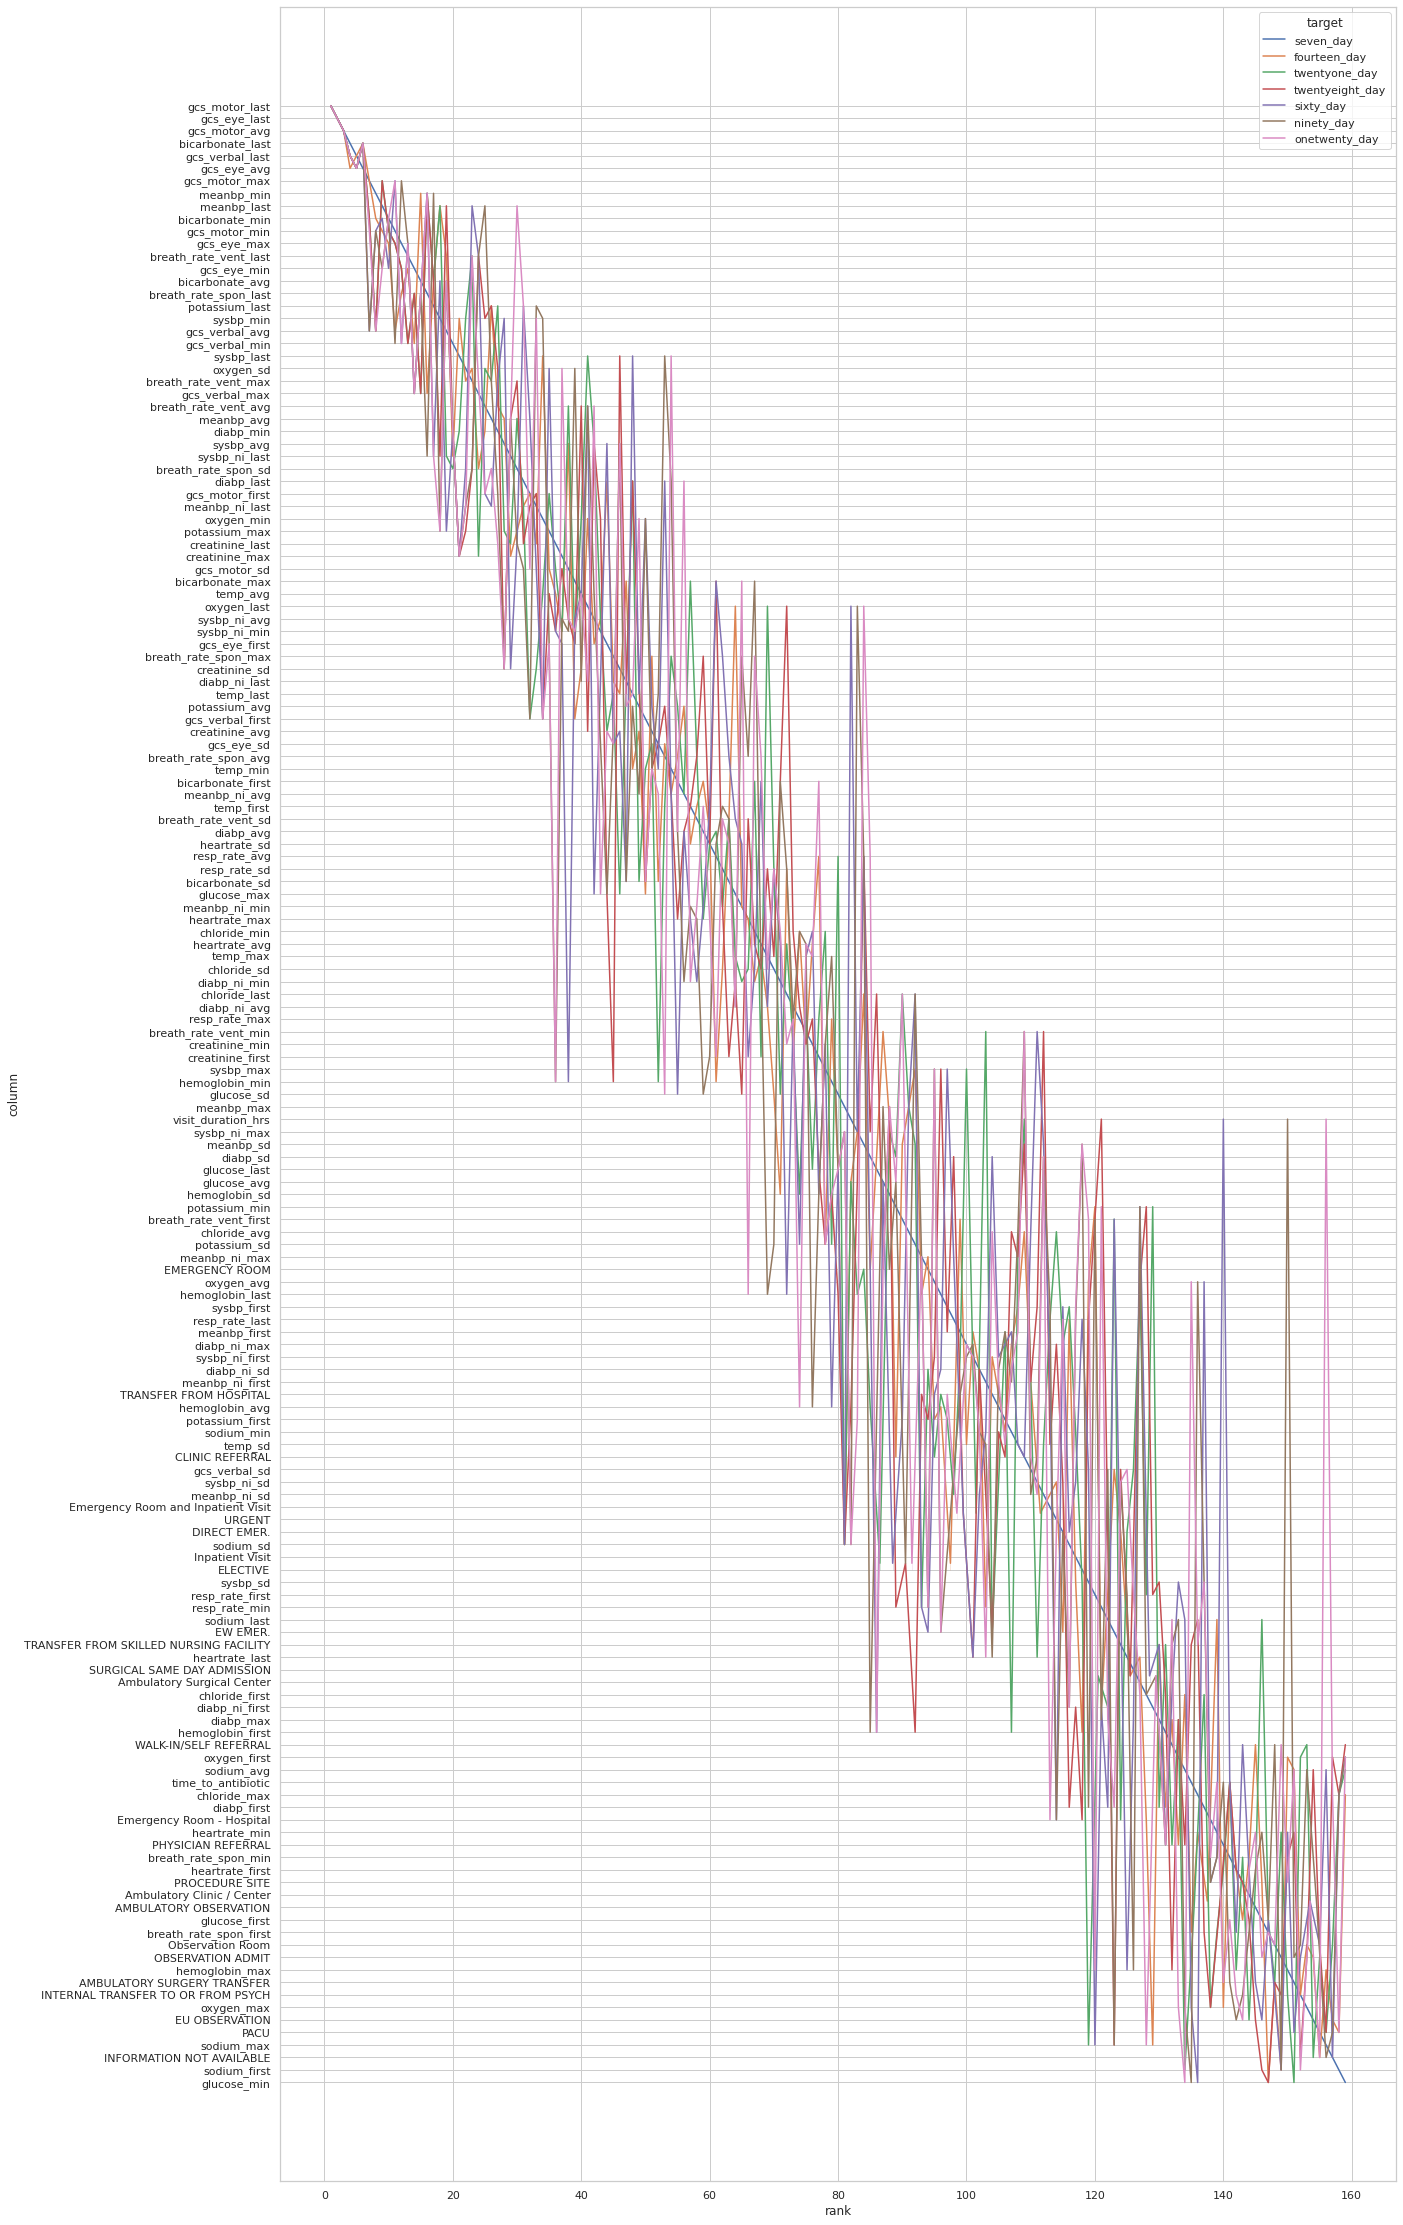

In [125]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20,40))
sns.set_theme(style="whitegrid")
sns.lineplot(y=plotDf['column'], x=plotDf['rank'], hue=plotDf.target)

### Top 10 features

In [126]:
dfList = []
for i in ['seven_day', 'fourteen_day', 'twentyone_day', 'twentyeight_day', 'sixty_day', 'ninety_day', 'onetwenty_day']:
    tempDf = univariateDf[['column', 'f_value_' + i, 'mutual_information_' + i, 'rank_' + i]]
    tempDf['target'] = [i] * tempDf.shape[0]
    tempDf.columns = ['column', 'f_value', 'mutual_information', 'rank', 'target']
    dfList.append(tempDf.iloc[:10])
plotDf = pd.concat(dfList)
plotDf.reset_index(inplace=True)
print(plotDf.shape)
plotDf.head()

(70, 6)


/tmp/ipykernel_1570044/3753666920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf['target'] = [i] * tempDf.shape[0]


,index,column,f_value,mutual_information,rank,target
0,0,gcs_motor_last,1720.037506,0.124689,1.0,seven_day
1,1,gcs_eye_last,1266.164107,0.086674,2.0,seven_day
2,2,gcs_motor_avg,1124.185544,0.095957,3.0,seven_day
3,3,bicarbonate_last,925.334461,0.077314,4.0,seven_day
4,4,gcs_verbal_last,806.000855,0.072540,5.0,seven_day


<AxesSubplot:xlabel='f_value', ylabel='column'>

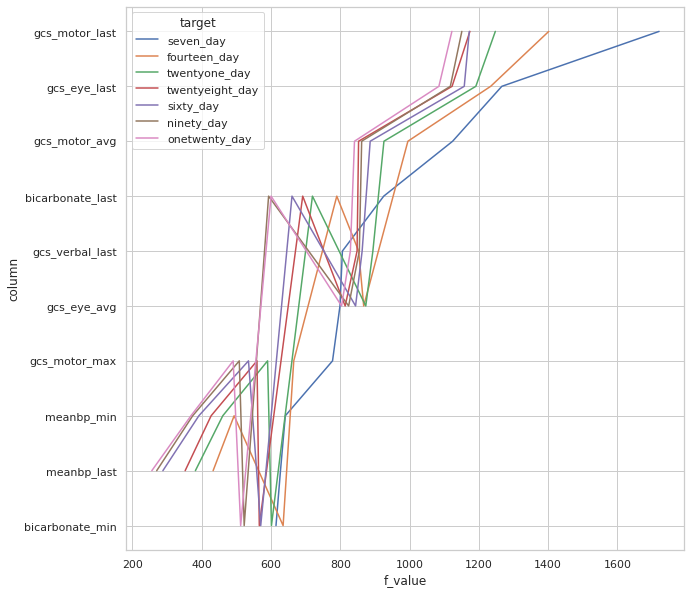

In [127]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.lineplot(y=plotDf['column'], x=plotDf.f_value, hue=plotDf.target)

<AxesSubplot:xlabel='rank', ylabel='column'>

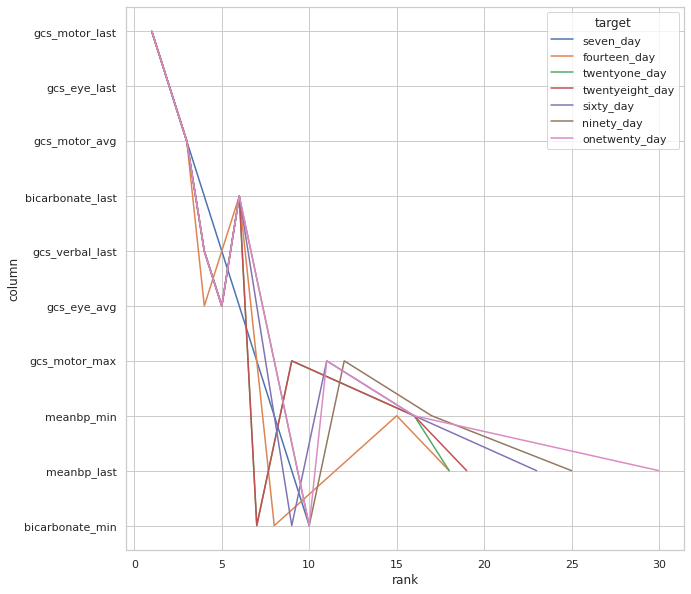

In [128]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.lineplot(y=plotDf['column'], x=plotDf['rank'], hue=plotDf.target)

### Features of interest

In [138]:
dfList = []
for i in ['seven_day', 'fourteen_day', 'twentyone_day', 'twentyeight_day', 'sixty_day', 'ninety_day', 'onetwenty_day']:
    tempDf = univariateDf[['column', 'f_value_' + i, 'mutual_information_' + i, 'rank_' + i]]
    tempDf['target'] = [i] * tempDf.shape[0]
    tempDf.columns = ['column', 'f_value', 'mutual_information', 'rank', 'target']
    dfList.append(tempDf[tempDf['column'].isin(['time_to_antibiotic', 'visit_duration_hrs'])])
plotDf = pd.concat(dfList)
plotDf.reset_index(inplace=True)
print(plotDf.shape)
plotDf

(14, 6)


/tmp/ipykernel_1570044/65144826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf['target'] = [i] * tempDf.shape[0]


,index,column,f_value,mutual_information,rank,target
0,81,visit_duration_hrs,74.182697,0.140934,82.0,seven_day
1,134,time_to_antibiotic,6.950347,0.015961,135.0,seven_day
2,81,visit_duration_hrs,58.966142,0.141547,88.0,fourteen_day
3,134,time_to_antibiotic,5.002487,0.008298,141.0,fourteen_day
4,81,visit_duration_hrs,34.818641,0.150726,109.0,twentyone_day
5,134,time_to_antibiotic,4.582335,0.018588,141.0,twentyone_day
6,81,visit_duration_hrs,18.136091,0.157029,121.0,twentyeight_day
7,134,time_to_antibiotic,4.060181,0.017366,141.0,twentyeight_day
8,81,visit_duration_hrs,4.082554,0.160002,140.0,sixty_day
9,134,time_to_antibiotic,3.612605,0.020858,141.0,sixty_day


<AxesSubplot:xlabel='f_value', ylabel='column'>

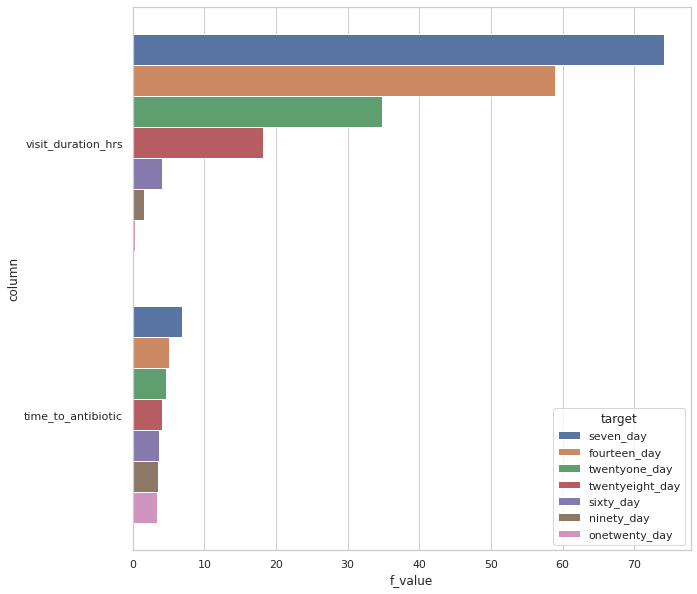

In [140]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(y=plotDf['column'], x=plotDf.f_value, hue=plotDf.target)

<AxesSubplot:xlabel='rank', ylabel='column'>

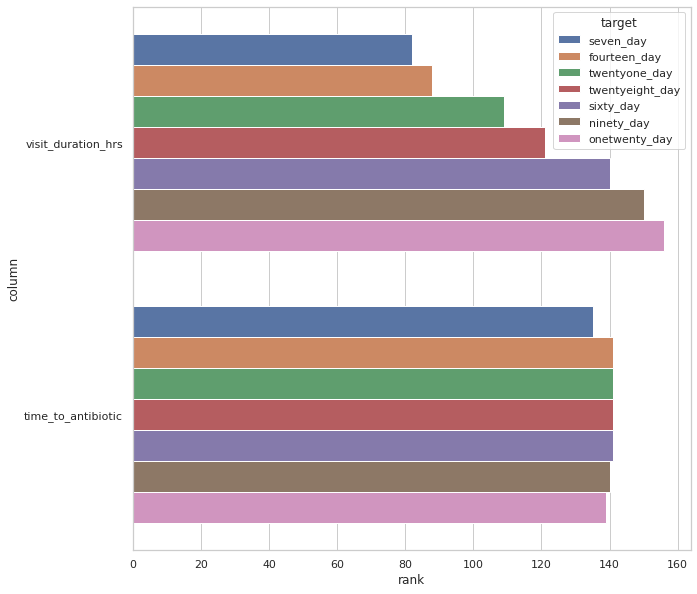

In [141]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.barplot(y=plotDf['column'], x=plotDf['rank'], hue=plotDf.target)